## Basics

In [ ]:
from primitives import Parameters
p = Parameters()
import matplotlib.pyplot as plt
import numpy as np
cc_J,cc_W,cc_Wstar,cc_Jpi,cc_pc,mwc_J,mwc_W,mwc_Wstar,mwc_pc,mwc_n1,mwc_s_J,mwc_s_W,mwc_s_Wstar,mwc_s_sep,mwc_s_dir_J,mwc_s_dir_W,mwc_s_dir_Wstar,mwc_s_dir_sep=None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None

In [ ]:
from ContinuousContract import ContinuousContract
cc=ContinuousContract(p)
(cc_J,cc_W,cc_Wstar,cc_Jpi,cc_pc)=cc.J(0)

In [3]:
#%%timeit
from Multiworker_Contract import MultiworkerContract
K=2 #number of tenure levels
mwc=MultiworkerContract(p,cc.js)
(mwc_J,mwc_W,mwc_Wstar,mwc_pc,mwc_n1)=mwc.J()
#(mwc_J,mwc_W,mwc_Wstar,mwc_pc,mwc_n1)=mwc.J(0,mwc_J,mwc_W) #15min with the complex version (ite_num>20)

Errors: 0.07023978206881265 3.6520655406789944 27.869006920410445 0.9119741093174752 1
Errors: 0.0 3.6520655406789944 27.869006920410445 0.9119741093174752 1
EJinv -8.457911121203468
EJderiv 71.9415482844426
EJinv diff 1j 2s: 4.860442354668604
EJinv diff 1 sen: 0.2554141117595743
EJinv diff 2 sen: 0.25541411175916173
EJinv -9.410718823497241
EJderiv 70.95542607266307
EJinv diff 1j 2s: 3.452981337025344
EJinv diff 1 sen: 0.3888196744363975
EJinv diff 2 sen: 0.3888196744873636
EJinv -10.471386466111806
EJderiv 69.9837545608251
EJinv diff 1j 2s: 3.0846920275190404
EJinv diff 1 sen: 0.2726617189150082
EJinv diff 2 sen: 0.2726617189156829
EJinv -11.539947933156654
EJderiv 69.02478089338115
EJinv diff 1j 2s: 1.985396485345692
EJinv diff 1 sen: 0.27405356594453223
EJinv diff 2 sen: 0.2740535659639763
EJinv -12.570470063898483
EJderiv 68.07781500293063
EJinv diff 1j 2s: 1.9355956125611684
EJinv diff 1 sen: 0.4134636998134931
EJinv diff 2 sen: 0.4134636998077313
EJinv -13.523752485618093
EJderi

In [ ]:
((mwc_J[p.z_0-1,1,3,50]-mwc_J[p.z_0-1,1,1,50])/2+mwc.N_grid[2]*mwc.rho_grid[50]*(mwc_W[p.z_0-1,1,3,50,1]-mwc_W[p.z_0-1,1,1,50,1])/2+mwc.w_grid[50]-mwc.fun_prod_onedim[p.z_0-1]*mwc.prod_1d[p.z_0-1,1,3,50])/(p.beta*mwc_pc[p.z_0-1,1,3,50])

In [ ]:
mwc.fun_prod_onedim[-1]

In [ ]:
(mwc_J[p.z_0-1,1,3,50]-mwc_J[p.z_0-1,1,1,50])/2

In [ ]:
mwc_W[p.z_0-1,1,3,50,1]-mwc_W[p.z_0-1,1,1,50,1]

In [ ]:
mwc_W[0,1,0,:,1] #this guy's value is kinda undefined, no? can't really use it meaninfully

In [ ]:
mwc.rho_grid[99]

In [ ]:
#%%timeit
from Multiworker_Contract_sep import MultiworkerContract
K=2 #number of tenure levels
mwc=MultiworkerContract(p,cc.js)
(mwc_s_J,mwc_s_W,mwc_s_Wstar,mwc_s_sep)=mwc.J()
#(mwc_J,mwc_W,mwc_Wstar,mwc_pc,mwc_n1)=mwc.J(0,mwc_J,mwc_W)

In [ ]:
#%%timeit
from Multiworker_Contract_sep_direct import MultiworkerContract
K=2 #number of tenure levels
mwc=MultiworkerContract(p,cc.js)
(mwc_s_dir_J,mwc_s_dir_W,mwc_s_dir_Wstar,mwc_s_dir_sep)=mwc.J()

# Plots

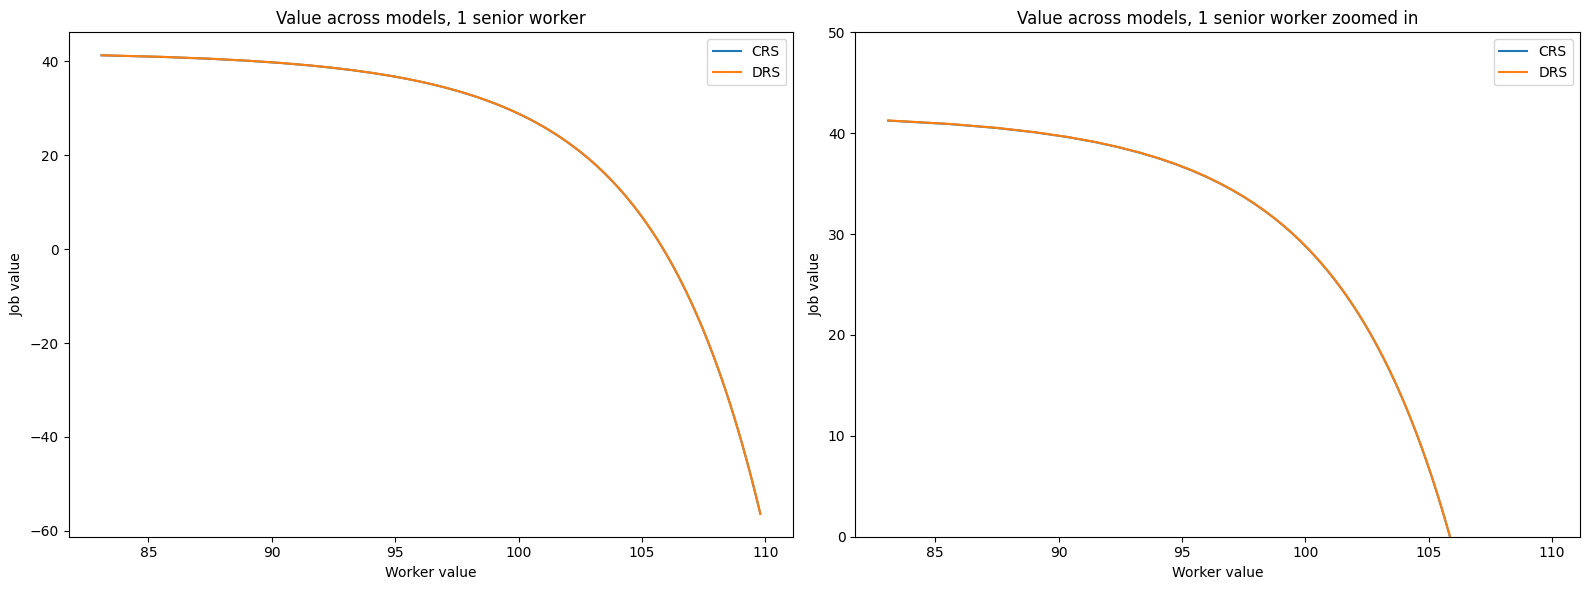

In [4]:
from plots import Plots
plts=Plots(p)

plts.CRSvsDRSvalue(cc_W,cc_J,mwc_W,mwc_J,mwc_s_W,mwc_s_J,mwc_s_dir_W,mwc_s_dir_J,0)

In [ ]:
plts.CRSvsDRSpolicy(cc_W,cc_Wstar,mwc_W,mwc_Wstar,mwc_s_W,mwc_s_Wstar,mwc_s_dir_W,mwc_s_dir_Wstar,0)

In [ ]:
plts.ValueComparison(3,0,1,2,cc_W,cc_J,mwc_W,mwc_J,mwc_s_W,mwc_s_J,mwc_s_dir_W,mwc_s_dir_J,0)

In [ ]:
np.max(mwc_s_dir_sep[:,1,2,:])

In [ ]:
import matplotlib.pyplot as plt
import os
# Create a directory to save plots
output_dir = 'Plots'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

In [ ]:
jun=1
sen=1
if mwc_s_W is not None:        
    plt.plot(mwc_s_W[p.z_0-1, jun, sen, :, 1], mwc_s_sep[p.z_0-1, jun, sen, :], label='DRS with inv sep')
if mwc_s_dir_W is not None:        
    plt.plot(mwc_s_dir_W[p.z_0-1, jun, sen, :, 1], mwc_s_dir_sep[p.z_0-1, jun, sen, :], label='DRS with direct sep')

plt.title(f'Separations across models, {jun} juniors and {sen} seniors')
plt.xlabel('Worker value')
plt.ylabel('Sep rate')
plt.legend()
#Why does the job value rise when separations go to 1?
#Alex: when something strange is arising at the edge of the grid, it might be the extrapolation issue.
#Is there a way to check my intuition? Seems consistent with size and productivity changes

In [ ]:
plts.CRSvsDRSdirect(cc_J,mwc_J,0)

In [ ]:
plts.CRSvsDRSsurplus(cc_J,cc_W,mwc_J,mwc_W,0)

In [ ]:
import matplotlib.pyplot as plt
import os
# Create a directory to save plots
output_dir = 'Plots'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

In [ ]:
np.abs(mwc_s_sep[:,:1,:3,:]-mwc_s_dir_sep[:,:1,:3,:]).max()

In [ ]:
np.max(np.abs(mwc_s_sep[:,3,0,:]-mwc_s_dir_sep[:,3,0,:]))

In [ ]:
np.max(mwc_s_dir_sep[:,1,1,:])

In [ ]:
mwc_s_dir_sep[:,1,1,:]

In [ ]:
mwc_s_J[:,1,0,:]/mwc_s_J[:,3,0,:] #this is odd, should be 1/3 exactly, no? it is 1/3 in the case without separations, so why not here? there aren't even any separations!

In [ ]:
np.max(mwc_s_sep[:,3,0,:])

In [ ]:
mwc_s_sep[0,1,1,:] #if the two value functions intersect, then how come the separation rate is 1?
#also thats way too many separations